<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/Probassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

In [1]:
import numpy as np
from scipy.stats import lognorm, beta, norm

# parameters for each variable
n = 10000  # Sample size for Monte Carlo Simulation
threshold = 35000  # Cost threshold

# Parameters for W
W_median = 2000
W_cov = 0.20
W_sigma = np.sqrt(np.log(1 + W_cov**2))  # Sigma for lognormal distribution
W_mu = np.log(W_median) - 0.5 * W_sigma**2  # Mu for lognormal distribution

# Parameters for F
F_alpha, F_beta = 3, 3  # Shape parameters for beta distribution (assuming symmetry)
F_median = 20
F_cov = 0.15
F_low, F_high = 0, 50  # Range for F

# Parameters for E
E_mean = 1.6
E_cov = 0.125
E_sigma = E_mean * E_cov  # Standard deviation for normal distribution


In [2]:
# Generating samples for W, F, and E
W_samples = lognorm(s=W_sigma, scale=np.exp(W_mu)).rvs(size=n)
F_samples = beta(a=F_alpha, b=F_beta, loc=F_low, scale=(F_high - F_low)).rvs(size=n)
E_samples = norm(loc=E_mean, scale=E_sigma).rvs(size=n)


In [3]:
# Calculating C for each sample
C_samples = W_samples * F_samples / np.sqrt(E_samples)

# Calculating the probability that C > 35000
probability_exceeds = np.mean(C_samples > threshold)
print(f"Probability that the annual cost exceeds $35,000: {probability_exceeds:.4f}")


Probability that the annual cost exceeds $35,000: 0.5771


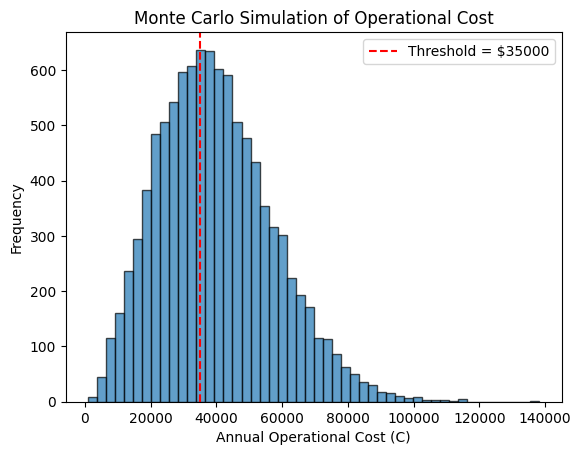

In [4]:
import matplotlib.pyplot as plt

plt.hist(C_samples, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = ${threshold}')
plt.xlabel('Annual Operational Cost (C)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Operational Cost')
plt.legend()
plt.show()


**Problem 2**

In [5]:
import numpy as np
from scipy.stats import beta, genextreme

# Defining constants and parameters
n = 10000  # Sample size for Monte Carlo Simulation
W = 200  # Weight of the tank in kips
g = 32.2  # Acceleration due to gravity in ft/s^2

# Parameters for k (coefficient of friction)
k_alpha = 3.0  # Shape parameter q
k_beta = 3.0   # Shape parameter r
k_median = 0.4
k_cov = 0.20
k_low, k_high = 0, 1  # Assuming k is bounded between 0 and 1

# Parameters for a (maximum ground acceleration)
a_mean = 0.30 * g  # Convert to ft/s^2 by multiplying with g
a_cov = 0.0035  # Given in percentage (0.35%)
a_sigma = a_mean * a_cov  # Standard deviation


In [6]:
# Generating samples for k (beta-distributed)
k_samples = beta(a=k_alpha, b=k_beta, loc=k_low, scale=(k_high - k_low)).rvs(size=n)

# Generating samples for a (Type I extreme value distribution)
# Using the generalized extreme value (GEV) distribution in scipy.stats
a_samples = genextreme(-1, loc=a_mean, scale=a_sigma).rvs(size=n)


In [7]:
# Calculating resistance and inertial force
R_samples = k_samples * W
F_samples = W * a_samples / g

# Calculating the probability that R < F
probability_slide = np.mean(R_samples < F_samples)
print(f"Probability that a tank will slide from its base during an earthquake: {probability_slide:.4f}")


Probability that a tank will slide from its base during an earthquake: 0.1712


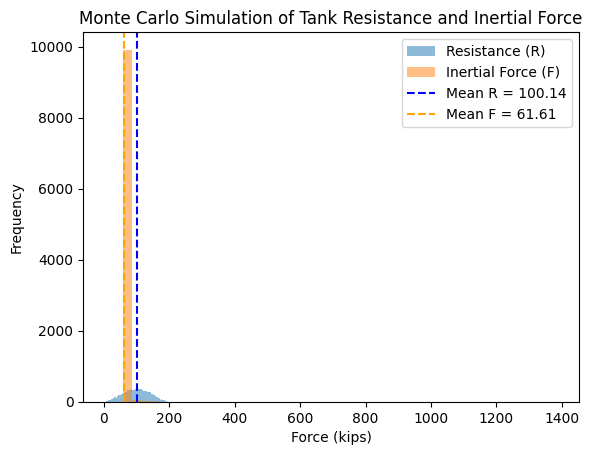

In [8]:
import matplotlib.pyplot as plt

plt.hist(R_samples, bins=50, alpha=0.5, label='Resistance (R)')
plt.hist(F_samples, bins=50, alpha=0.5, label='Inertial Force (F)')
plt.axvline(np.mean(R_samples), color='blue', linestyle='--', label=f'Mean R = {np.mean(R_samples):.2f}')
plt.axvline(np.mean(F_samples), color='orange', linestyle='--', label=f'Mean F = {np.mean(F_samples):.2f}')
plt.xlabel('Force (kips)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Tank Resistance and Inertial Force')
plt.legend()
plt.show()


**Problem 3**

In [9]:
import numpy as np
from scipy.stats import lognorm

# Defining constants and parameters
n = 10000  # Sample size for Monte Carlo Simulation

# Parameters for individual pile capacity
pile_capacity_mean = 20  # Mean capacity in tons
pile_capacity_cov = 0.20  # Coefficient of variation
pile_sigma = np.sqrt(np.log(1 + pile_capacity_cov**2))
pile_mu = np.log(pile_capacity_mean) - 0.5 * pile_sigma**2

# Parameters for maximum lifetime load
load_mean = 10  # Mean load in tons
load_cov = 0.30  # Coefficient of variation
load_sigma = np.sqrt(np.log(1 + load_cov**2))
load_mu = np.log(load_mean) - 0.5 * load_sigma**2

# Correlation between the two piles
correlation = 0.8


In [10]:
# Generating correlated standard normal samples
mean = [0, 0]
cov_matrix = [[1, correlation], [correlation, 1]]  # Correlation structure
norm_samples = np.random.multivariate_normal(mean, cov_matrix, size=n)

# Transforming the samples to lognormal distribution for each pile's capacity
pile1_samples = np.exp(pile_mu + pile_sigma * norm_samples[:, 0])
pile2_samples = np.exp(pile_mu + pile_sigma * norm_samples[:, 1])

# Calculating total capacity of the pile group
T_samples = pile1_samples + pile2_samples


In [11]:
# Generating samples for load (lognormal distribution)
load_samples = lognorm(s=load_sigma, scale=np.exp(load_mu)).rvs(size=n)

# Determining the probability of failure (when load > T)
failure_probability = np.mean(load_samples > T_samples)
print(f"Probability of failure of the pile group: {failure_probability:.4f}")

# Calculating the mean and cov of T
mean_T = np.mean(T_samples)
cov_T = np.std(T_samples) / mean_T
print(f"Mean capacity of the pile group: {mean_T:.2f} tons")
print(f"Coefficient of variation of the pile group capacity: {cov_T:.4f}")


Probability of failure of the pile group: 0.0000
Mean capacity of the pile group: 40.06 tons
Coefficient of variation of the pile group capacity: 0.1896


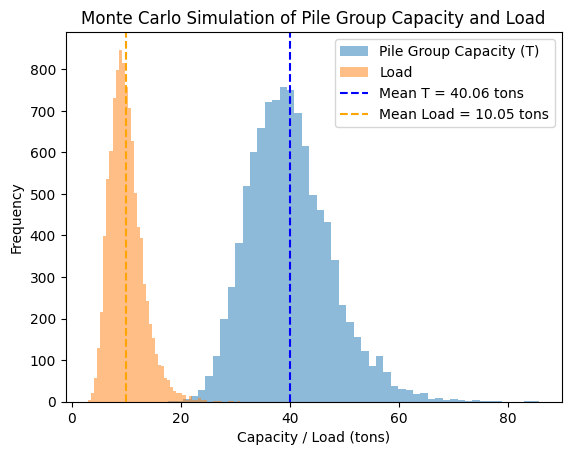

In [12]:
import matplotlib.pyplot as plt

plt.hist(T_samples, bins=50, alpha=0.5, label='Pile Group Capacity (T)')
plt.hist(load_samples, bins=50, alpha=0.5, label='Load')
plt.axvline(mean_T, color='blue', linestyle='--', label=f'Mean T = {mean_T:.2f} tons')
plt.axvline(np.mean(load_samples), color='orange', linestyle='--', label=f'Mean Load = {np.mean(load_samples):.2f} tons')
plt.xlabel('Capacity / Load (tons)')
plt.ylabel('Frequency')
plt.title('Monte Carlo Simulation of Pile Group Capacity and Load')
plt.legend()
plt.show()
